# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Diogo Fernandes Costa

Datum: 17.11.2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Was ist die gemessene Wärmekapazität des Wassers?

## Versuchsaufbau und Durchführung
Ich habe 100ml warmes Wasser in ein Glas und 100ml kaltes Wasser in eine Schüssel getan. Das warme Wasser hatte zu Beginn eine Temperatur von 35°C und das kalte Wasser hatte Raumtemperatur. Die Temperatur habe ich über den check_sensors()-Befehl gemessen.
Dann habe ich den Versuch durchgeführt und nach der ersten Temperaturmessung das warme Wasser mit dem Temperatursensor in die Schüssel geschüttet. Der Versuch galt als beendet, als die beiden Temperatursensoren fast die gleiche Temperatur hatten.


![Bild_Kapazitaet_Versuch.jpg](archiv/Heat_capacity_Experiment/Bild_Kapazitaet_Versuch.jpg)

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5

from functions import m_json



# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path = '/home/jovyan/work/calorimetry_home/archiv/Heat_capacity_Experiment/Heat_capacity_Experiment.h5'
# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5.File(path, "r")
    
author = f.attrs["authors"]
created = f.attrs["created"]
experiment = f.attrs["experiment"]
group_number= f.attrs["group_number"]
    
keys = f['RawData'].keys()

temperature_sensor_1 = f['RawData']['Sensors']['1ee7d8b5-12ad-6faa-a891-1cee8d14824f']['Temperature'][()]
temperature_sensor_2 = f['RawData']['Sensors']['1ee7d8bb-aacf-6654-84cf-8593bfc4d1ea']['Temperature'][()]

timestamp_sensor_1 = f['RawData']['Sensors']['1ee7d8b5-12ad-6faa-a891-1cee8d14824f']['Timestamp'][()]
timestamp_sensor_2 = f['RawData']['Sensors']['1ee7d8bb-aacf-6654-84cf-8593bfc4d1ea']['Timestamp'][()]


f.close()
# DONE #

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in Grad Celsius')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


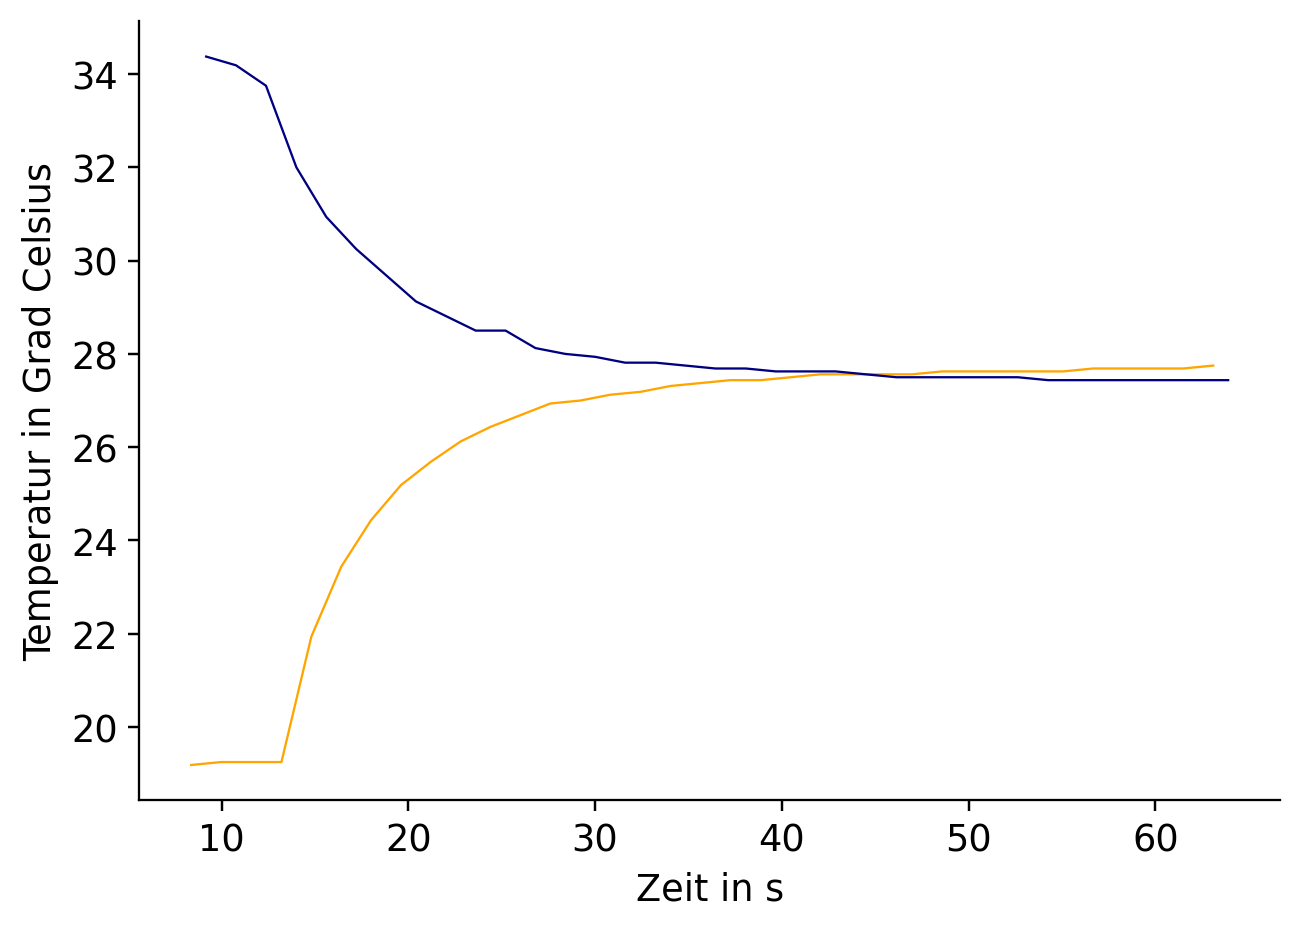

In [5]:
# TODO: Use the temperature and time data for plotting
plt.plot(timestamp_sensor_1,temperature_sensor_1, color = 'orange')
plt.plot(timestamp_sensor_2,temperature_sensor_2, color = 'navy')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in Grad Celsius")

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [6]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
metadata = m_json.get_metadata_from_setup('/home/jovyan/work/calorimetry_home/datasheets/setup_heat_capacity.json')
print(metadata)
probe_UUID = metadata['probe']['values'][0]
print(probe_UUID)
m_cup = m_json.get_json_entry('datasheets', probe_UUID, ['probe', 'metadata', 'mass_1'])
m_add = m_json.get_json_entry('datasheets', probe_UUID, ['probe', 'metadata', 'mass_2'])
print(m_cup)
print(m_add)
m_cup = float(m_cup)
m_add = float(m_add)
# DONE #

{'group_info': {'values': ['1ee80ac5-b2e8-69ec-bc51-4ea55456b13c']}, 'instrument': {'values': ['1ee80acc-346f-6430-9c68-69c8e8396c06']}, 'probe': {'values': ['1ee85f90-bbce-6e50-a100-35043ae2c7ee']}, 'sensor': {'values': ['1ee7d8b5-12ad-6faa-a891-1cee8d14824f', '1ee7d8bb-aacf-6654-84cf-8593bfc4d1ea']}}
1ee85f90-bbce-6e50-a100-35043ae2c7ee
0.1
0.099


#### (iV) Anfangs- und Endwert der Temperatur

In [7]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T2 = temperature_sensor_1[0]
T1 = temperature_sensor_2[0]
TM = (temperature_sensor_1[-1]+temperature_sensor_2[-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [8]:
# TODO: Calculate heat capacity of the calorimeter
C = (m_add*water_heat_capa*(T2-TM)/(TM-T1))-(m_cup*water_heat_capa)

# DONE #

#### (Vi) Ergebnis

In [9]:
# TODO: Print result
print(str(C) +' kJ/K')

# DONE #

0.09498423963133634 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die von mir berechnete Wärmekapazität von Wasser beträgt etwa 0.094 J/K. Dieser experimentell ermittelte Wert weicht sehr stark von dem wissenschaftlich anerkannten Wert ab und ist deswegen für weitere Nutzung in Experimenten unbrauchbar.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Während meiner Experimente wurde mir klar, dass nicht jedes wissenschaftliche Vorhaben zwangsläufig die erwünschten Ergebnisse liefert. Nichtsdestotrotz war die Durchführung des Experiments war äußerst aufschlussreich, um die Bedeutung der Struktur und Übersichtlichkeit wissenschaftlicher Versuche nachvollziehen zu können. Zudem habe ich im Laufe der Versuchsvor- und nachbearbeitung gelernt, wie man Metadaten und Messdaten integriert sowie ein vertieftes Verständnis für die Struktur von H5-Dateien entwickelt."